In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
import os

In [3]:
os.chdir("E:\SIC")

In [4]:
housing = pd.read_csv("housing2.csv" , sep = "," , encoding = 'utf-8')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [6]:
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

<AxesSubplot:>

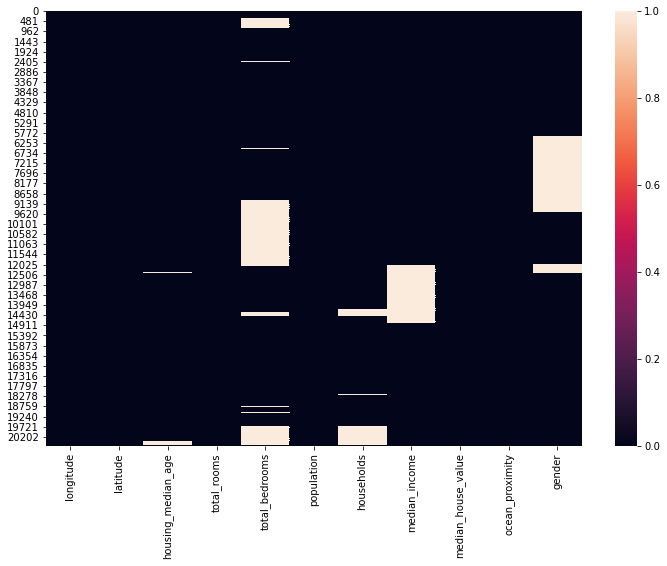

In [7]:
plt.figure(figsize= (12,8))
sns.heatmap(housing.isnull())

In [8]:
datana=housing.copy()
data=housing.dropna()

In [9]:
data['households'] = data['households'].astype(float)

<ipython-input-9-7476cfe38bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['households'] = data['households'].astype(float)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10177 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10177 non-null  float64
 1   latitude            10177 non-null  float64
 2   housing_median_age  10177 non-null  float64
 3   total_rooms         10177 non-null  int64  
 4   total_bedrooms      10177 non-null  float64
 5   population          10177 non-null  float64
 6   households          10177 non-null  float64
 7   median_income       10177 non-null  float64
 8   median_house_value  10177 non-null  int64  
 9   ocean_proximity     10177 non-null  object 
 10  gender              10177 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 954.1+ KB


<AxesSubplot:>

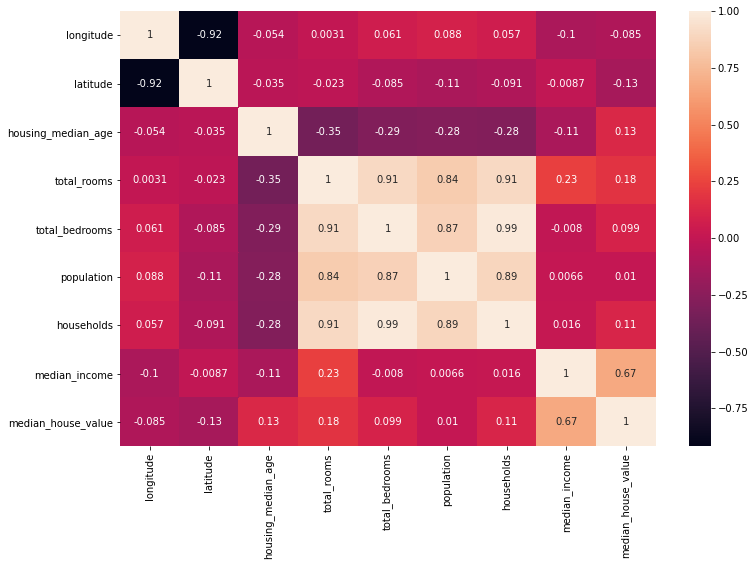

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr() , annot = True)

# filling missing data for housing_median age

In [12]:
datana['housing_median_age'].fillna(method='bfill',inplace=True)

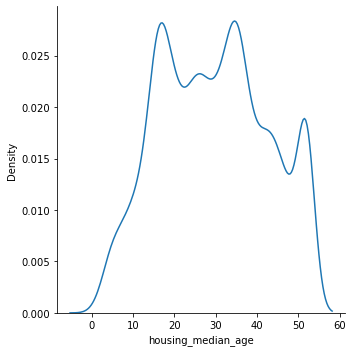

In [13]:
sns.displot(data=data, x="housing_median_age", kind="kde")

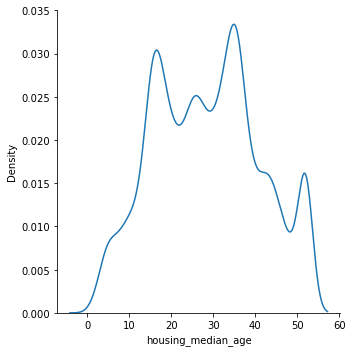

In [14]:
sns.displot(data=datana, x="housing_median_age", kind="kde")

# filling missing data for total_bedrooms 

In [15]:
x = data['total_rooms'].mean()/data['total_bedrooms'].mean()
x

4.819187052079389

In [16]:
def bedrooms(row):
    if (row['total_bedrooms']>0):
        bedroom = row['total_bedrooms']
        return bedroom
    else:
        bedroom  = row['total_rooms']/x
        return bedroom

In [17]:
datana['total_bedrooms'] = datana.apply(bedrooms , axis = 1)

In [18]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

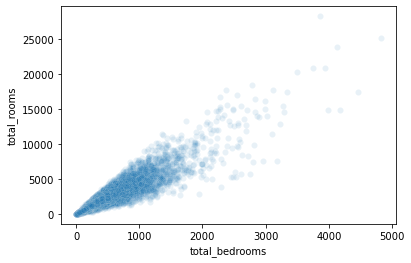

In [19]:
sns.scatterplot(data=data, x="total_bedrooms", y="total_rooms", alpha=.1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

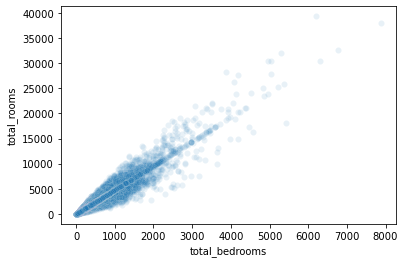

In [20]:
sns.scatterplot(data=datana, x="total_bedrooms", y="total_rooms", alpha=.1)

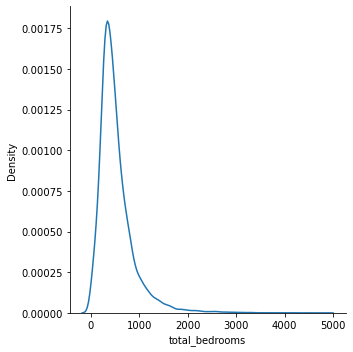

In [21]:
sns.displot(data=data, x="total_bedrooms", kind="kde")

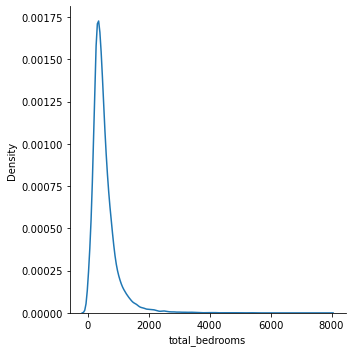

In [22]:
sns.displot(data=datana, x="total_bedrooms", kind="kde")

# filling missing data for population 

In [23]:
x = data['population'].mean()/data['total_bedrooms'].mean()
x

2.6170216920933136

In [24]:
def population(row):
    if (row['population']>0):
        population = row['population']
        return population
    else:
        bedroom  = row['total_bedrooms']*x
        return bedroom

In [25]:
datana['population'] = datana.apply(population , axis = 1)

In [26]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='total_bedrooms', ylabel='population'>

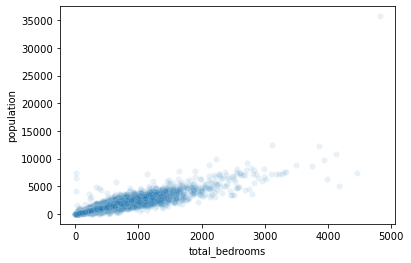

In [27]:
sns.scatterplot(data=data, x="total_bedrooms", y="population",alpha=.1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='population'>

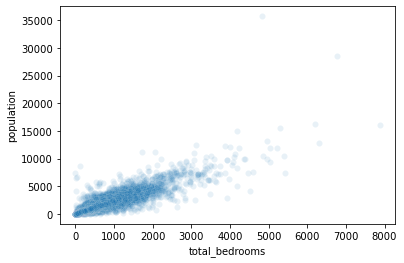

In [28]:
sns.scatterplot(data=datana, x="total_bedrooms", y="population",alpha=.1)

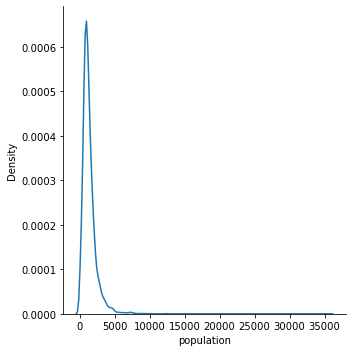

In [29]:
sns.displot(data=data, x="population", kind="kde")

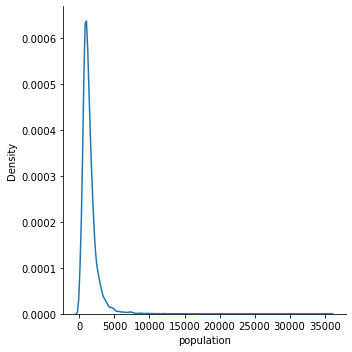

In [30]:
sns.displot(data=datana, x="population", kind="kde")

# filling missing data & casting into float for households 

In [31]:
datana['households'].value_counts()[:5].index.tolist()

['no', '282', '375', '380', '306']

In [32]:
datana['households'] = datana['households'].replace(['no'],'0')

In [33]:
datana['households']=datana['households'].astype(float)

In [34]:
def household(row):
    if (row['households']>0):
        household = row['households']
        return household
    else:
        household  = int(row['total_bedrooms'])
        return household

In [35]:
datana['households'] =datana.apply(household,axis=1)

In [36]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


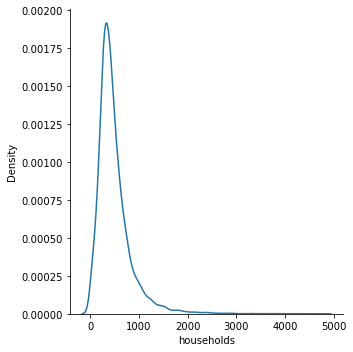

In [37]:
sns.displot(data=data, x="households", kind="kde")

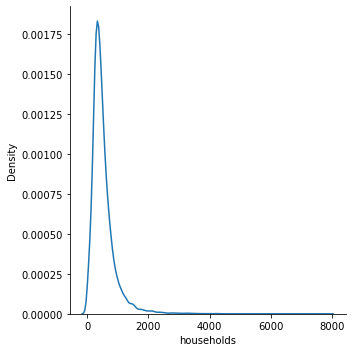

In [38]:
sns.displot(data=datana, x="households", kind="kde")

<AxesSubplot:xlabel='households', ylabel='population'>

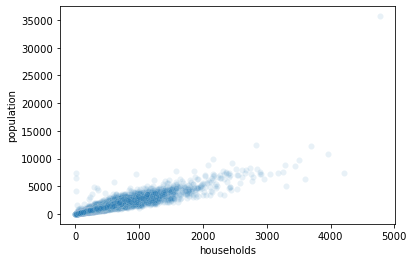

In [39]:
sns.scatterplot(data=data, x="households", y="population",alpha=.1)

<AxesSubplot:xlabel='households', ylabel='population'>

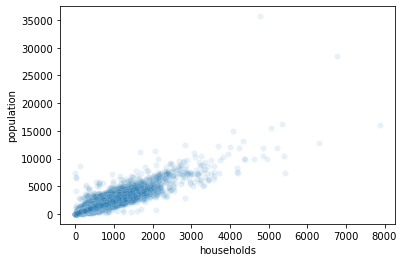

In [40]:
sns.scatterplot(data=datana, x="households", y="population",alpha=.1)

# filling missing data for median_income 

In [41]:
fill_list = data['median_income'].tolist()
datana['median_income'] = datana['median_income'].fillna(pd.Series(np.random.choice(fill_list , size = len(datana.index))))

In [42]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


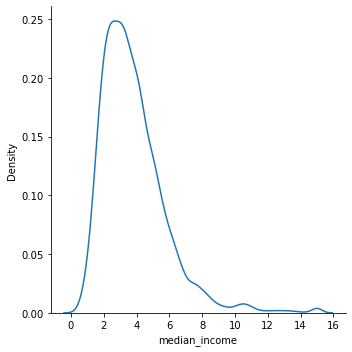

In [43]:
sns.displot(data=data, x="median_income", kind="kde")

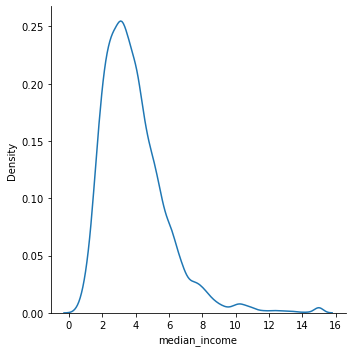

In [44]:
sns.displot(data=datana, x="median_income", kind="kde")

# filling missing data for gender 

In [45]:
fill_list = ['female' , 'male']
datana['gender'] = datana['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(housing.index))))

In [46]:
datana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              20640 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


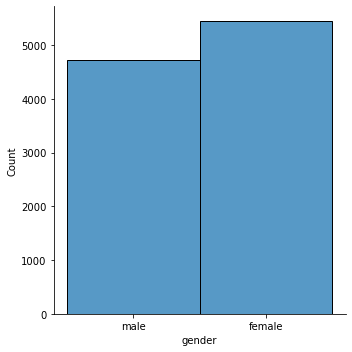

In [47]:
sns.displot(data=data, x="gender")

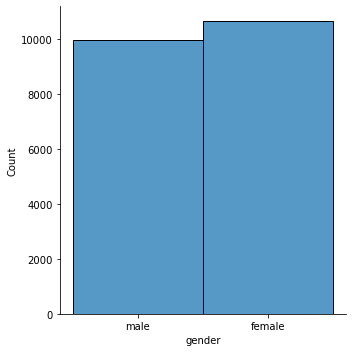

In [48]:
sns.displot(data=datana, x="gender")

# label encoding

In [49]:
gender_le = LabelEncoder()
ocean_proximity_le = LabelEncoder()

In [50]:
datana['gender'] = gender_le.fit_transform(datana['gender'])
datana['ocean_proximity'] = gender_le.fit_transform(datana['ocean_proximity'])

In [51]:
datana

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3,1
1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3,0
2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3,1
3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3,0
4,-122.25,37.85,42.0,1627,280.0,732.766074,259.0,3.8462,342200,3,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1,0
20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1,1
20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1,0
20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1,1


In [52]:
housing=datana.copy()

In [53]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3,1
1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3,0
2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3,1
3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3,0
4,-122.25,37.85,42.0,1627,280.0,732.766074,259.0,3.8462,342200,3,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1,0
20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1,1
20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1,0
20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1,1


In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
 10  gender              20640 non-null  int32  
dtypes: float64(7), int32(2), int64(2)
memory usage: 1.6 MB


<AxesSubplot:>

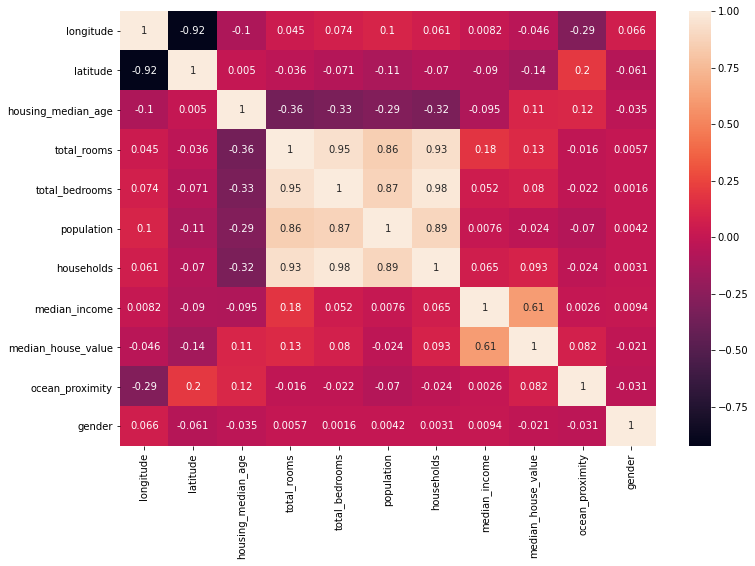

In [55]:
plt.figure(figsize= (12,8))
sns.heatmap(housing.corr() , annot = True )

<AxesSubplot:>

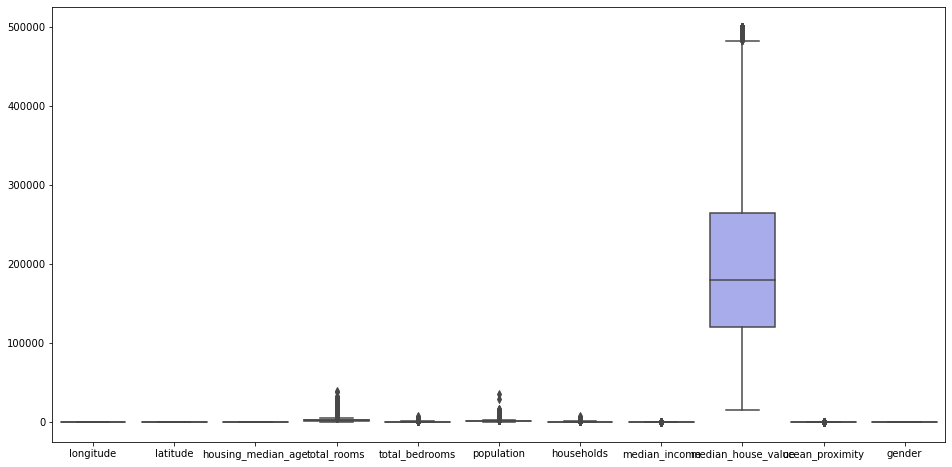

In [56]:
plt.figure(figsize=(16,8))
sns.boxplot(data=housing)

<AxesSubplot:xlabel='median_house_value'>

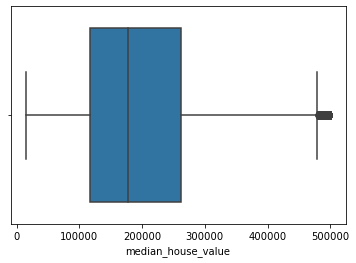

In [65]:
sns.boxplot(x=housing['median_house_value'])

<AxesSubplot:xlabel='total_rooms'>

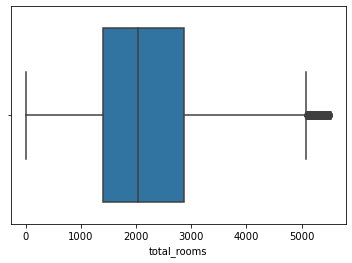

In [66]:
sns.boxplot(x=housing['total_rooms'])

C:\Users\Osama Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

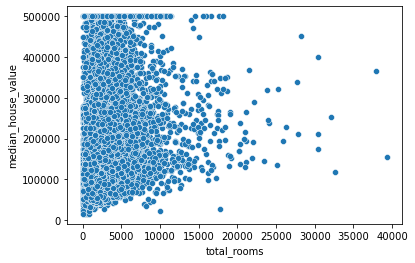

In [60]:
sns.scatterplot(housing['total_rooms'], housing['median_house_value'])

In [61]:
cols = ['total_rooms']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

housing = housing[~((housing[cols] < (Q1 - 1.5 * IQR)) |(housing[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
housing.shape

(19245, 11)

C:\Users\Osama Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

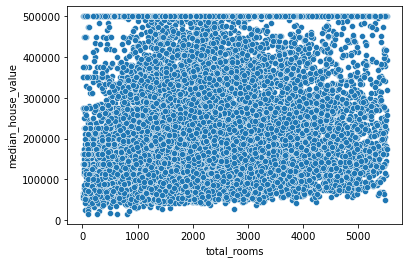

In [63]:
sns.scatterplot(housing['total_rooms'], housing['median_house_value'])

<AxesSubplot:xlabel='total_rooms'>

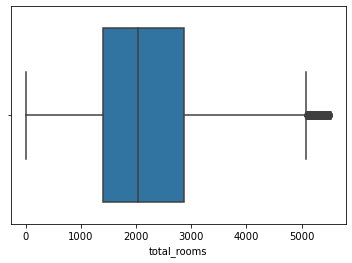

In [67]:
sns.boxplot(x=housing['total_rooms'])

In [57]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# the independent variables set
vif = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'gender']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]
  
print(vif_data)

              feature         VIF
0           longitude  636.852812
1            latitude  569.161228
2  housing_median_age    7.555191
3         total_rooms   34.190033
4      total_bedrooms  109.495192
5          population   13.218136
6          households  111.530753
7       median_income    7.015989
8     ocean_proximity    1.775986
9              gender    1.942570


In [72]:
x = housing.drop(['median_house_value'] , axis = 1).values
y = housing['median_house_value'].values

In [73]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 42)
x_train.shape

(14433, 10)

In [74]:
x_test.shape

(4812, 10)

In [75]:
from sklearn.preprocessing import StandardScaler
ro_scaler = StandardScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
x_train.shape

(14433, 10)

# Linear Regression

In [92]:
from sklearn import linear_model

In [93]:
reg = linear_model.LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [94]:
reg.score(x_train , y_train)

0.5629219478802535

In [95]:
reg.score(x_test , y_test)

0.5642274504681102

In [96]:
y_pred = reg.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df1.head()

,Y_test,Y_pred
0,110000,87003.252631
1,67500,127195.386231
2,500001,431178.115590
3,467700,332822.400542
4,155800,147561.552193


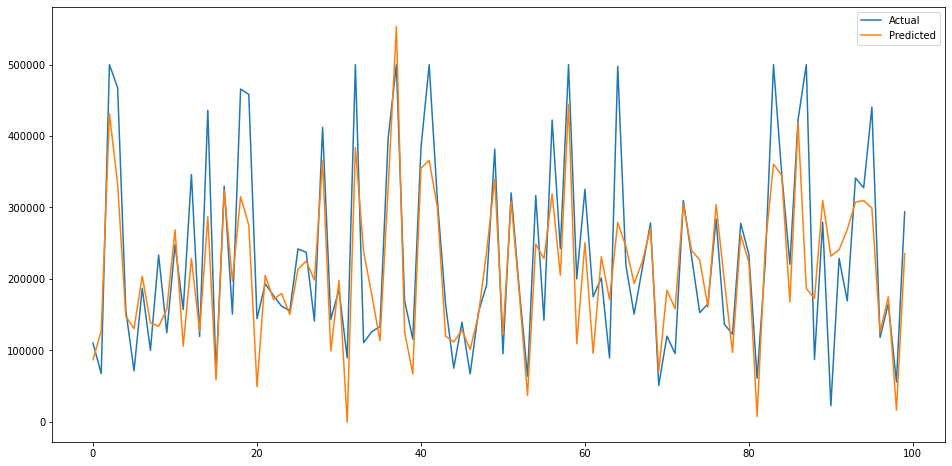

In [97]:
plt.figure(figsize=(16,8))
plt.plot(df1[:100])
plt.legend(['Actual' , 'Predicted'])

In [98]:
rid = linear_model.Ridge(alpha=.4)
rid.fit(x_train , y_train)

Ridge(alpha=0.4)

In [99]:
rid.score(x_train , y_train)

0.5629219243208368

In [100]:
rid.score(x_test , y_test)

0.564223708715802

In [101]:
reg.intercept_

204482.59260026846

In [120]:
reg.coef_
pd.DataFrame(rid.coef_ , housing.columns[:-1] , columns=['Coeficient'])

,Coeficient
longitude,-107276.026146
latitude,-113614.014639
housing_median_age,11367.943881
total_rooms,11361.643687
total_bedrooms,15591.649262
population,-41372.407078
households,18117.758954
median_income,55934.745725
median_house_value,-3910.240347
ocean_proximity,-2646.029213


In [103]:
y_pred = rid.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df2.head()

,Y_test,Y_pred
0,110000,87020.393756
1,67500,127215.487785
2,500001,431178.605025
3,467700,332795.383404
4,155800,147575.982552


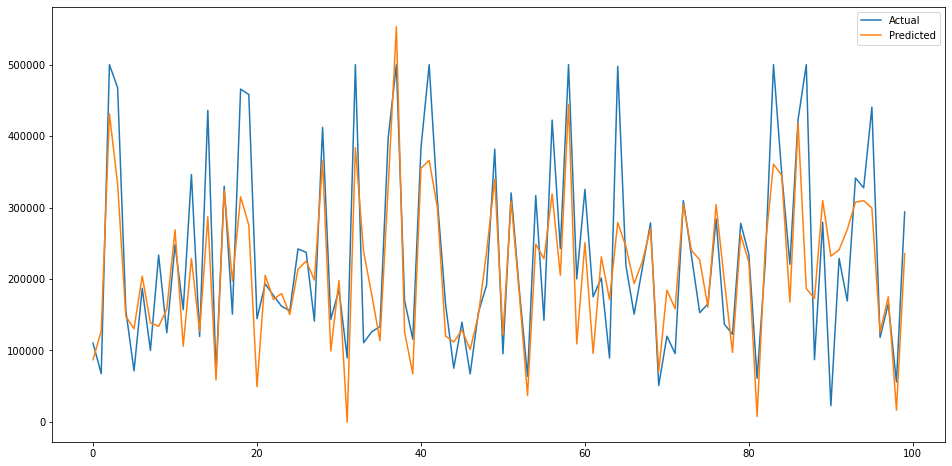

In [104]:
plt.figure(figsize=(16,8))
plt.plot(df2[:100])
plt.legend(['Actual' , 'Predicted'])

In [105]:
les = linear_model.Lasso(alpha=0.9)

In [106]:
les.fit(x_train , y_train)

Lasso(alpha=0.9)

In [107]:
les.score(x_train , y_train)

0.5629219449459066

In [108]:
les.score(x_test , y_test)

0.5642251670365328

In [109]:
les.intercept_

204482.5926002685

In [110]:
les.coef_

array([-107311.80167807, -113649.65196516,   11363.66980949,
         11364.44179364,   15594.36737532,  -41373.90023413,
         18111.55168463,   55931.50409029,   -3912.44933472,
         -2645.12919266])

In [119]:
pd.DataFrame(les.coef_ , housing.columns[:-1] , columns=['Coeficient'])

,Coeficient
longitude,-107311.801678
latitude,-113649.651965
housing_median_age,11363.669809
total_rooms,11364.441794
total_bedrooms,15594.367375
population,-41373.900234
households,18111.551685
median_income,55931.504090
median_house_value,-3912.449335
ocean_proximity,-2645.129193


In [117]:
y_pred = les.predict(x_test)
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head()

,Y_test,Y_pred
0,110000,87013.683136
1,67500,127197.780559
2,500001,431174.270113
3,467700,332814.436290
4,155800,147565.271350


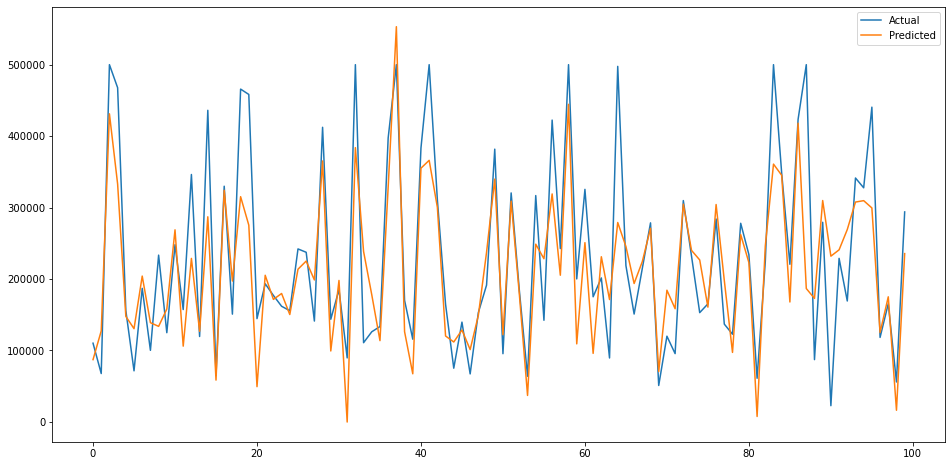

In [116]:
plt.figure(figsize=(16,8))
plt.plot(df3[:100])
plt.legend(['Actual' , 'Predicted'])

In [121]:
reg_pred = reg.predict(x_test)
rid_pred = rid.predict(x_test)
les_pred = les.predict(x_test)
df3 = pd.DataFrame({"Y_test": y_test , "reg_pred" : reg_pred , "rid_pred" : rid_pred , "les_pred" : les_pred})
df3.head()

,Y_test,reg_pred,rid_pred,les_pred
0,110000,87003.252631,87020.393756,87013.683136
1,67500,127195.386231,127215.487785,127197.780559
2,500001,431178.115590,431178.605025,431174.270113
3,467700,332822.400542,332795.383404,332814.436290
4,155800,147561.552193,147575.982552,147565.271350
